In [2]:
import random
import math
import pylab as pl
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

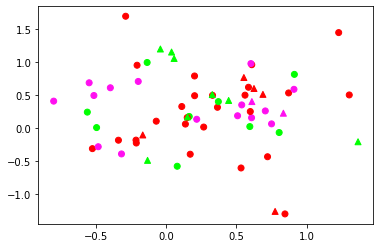

In [6]:
# Knn алгоритм
n = 50
m = 3
clas = np.random.randint(0,m,n)   
x_test = []
x_data = []
for i in range(n):
    centerX = random.random()*0.5
    centerY = random.random()*0.5
    x_data.append([[random.gauss(centerX,0.5),random.gauss(centerY,0.5)],clas[i]])
for i in range(15):
    x_test.append([random.gauss(centerX,0.5),random.gauss(centerY,0.5)])
classColormap  = ListedColormap(['#FF0000', '#00FF00', '#FF0FF0'])
plt.figure()
plt.scatter([x_data[i][0][0] for i in range(len(x_data))],[x_data[i][0][1] for i in range(len(x_data))], c = [x_data[i][1] for i in range(len(x_data))], cmap = classColormap)

def dist(a,b):
    return np.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)

def Klas(x_test, x_data, noc, K):
    d = []
    f = [0 for i in range(len(x_test))]

    
    for i in range(len(x_test)):
        t = [[dist(x_test[i],x_data[j][0]),x_data[j][1]] for j in range(len(x_data))]
        d.append(t)
    stat = [[0 for i in range(noc)] for j in range(len(d))]
    for i in range(len(d)):
        d[i] = sorted(d[i])[:K]

    for i in range(len(d)):
         for j in range(len(d[i])):
            stat[i][d[i][j][1]] += 1
    
    for i in range(len(stat)):
        k = 0
        for j in range(len(stat[i])):
            if stat[i][j] > k: 
                k = j
        f[i] = k

    x_p = [[x_test[i], f[i]] for i in range(len(x_test))]
    return x_p
        
x_p = Klas(x_test,x_data, m, 2)
plt.scatter([x_p[i][0][0] for i in range(len(x_p))], [x_p[i][0][1] for i in range(len(x_p))],c = [x_p[i][1] for i in range(len(x_p))], cmap = classColormap, marker = '^')
 
    